# LJ potential through restaurant location data

In [1]:
import pandas as pd
import seaborn as sns
import geopandas as gpd
import numpy as np
from tqdm import tqdm, trange
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/Users/georgexiu/Downloads/restaurant-master/data_dianping/food_beijing_v2.csv")
data = data.replace('-', np.nan).dropna()
data = data[data["review-count"] > 10]

In [3]:
data.sort_values('review-count', ascending=False)

,shopId,cityEnName,star,review-count,avg-price,taste,environment,service,categoryName,categoryURLName,...,mainCategoryName,power,shopGlat,shopGlng,shopPower,shopType,voteTotal,mainCategoryNameEn,lat_wgs,lng_wgs
63495,516112,beijing,45,30787.0,95,8.2,8.4,8.1,美食,food,...,小龙虾,5,39.909859,116.372875,45,10,0,crayfish,39.908481,116.366661
62341,507942,beijing,40,29578.0,82,8.2,7.6,7.4,美食,food,...,小吃,5,39.950817,116.416119,40,10,0,snack,39.949412,116.409872
37017,17988301,beijing,45,27341.0,110,8.7,9.0,8.7,美食,food,...,烧烤,5,39.950323,116.476710,45,10,0,grill,39.949015,116.470590
63414,515381,beijing,45,24824.0,71,8.0,7.3,9.0,美食,food,...,火锅,2,39.978891,116.368512,45,10,0,hotpot,39.977516,116.362296
63146,513329,beijing,45,20379.0,106,9.1,7.7,7.8,美食,food,...,涮羊肉,5,39.886772,116.363283,45,10,0,hotpot,39.885409,116.357089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59753,4670352,beijing,35,11.0,25,7.3,6.8,7.1,美食,food,...,家常菜,5,39.933240,116.393220,35,10,0,home_cooking,39.931840,116.386978
34364,15084651,beijing,35,11.0,16,7.4,7.3,7.3,美食,food,...,快餐简餐,5,39.989602,116.470176,35,10,0,fast,39.988276,116.464029
67944,58019806,beijing,35,11.0,20,7.1,7.2,7.2,美食,food,...,快餐简餐,5,39.978676,116.461410,35,10,0,fast,39.977330,116.455238
77311,66847813,beijing,30,11.0,52,6.8,6.8,6.7,美食,food,...,东北菜,5,39.823300,116.338150,30,10,0,eastnorth,39.821986,116.332018


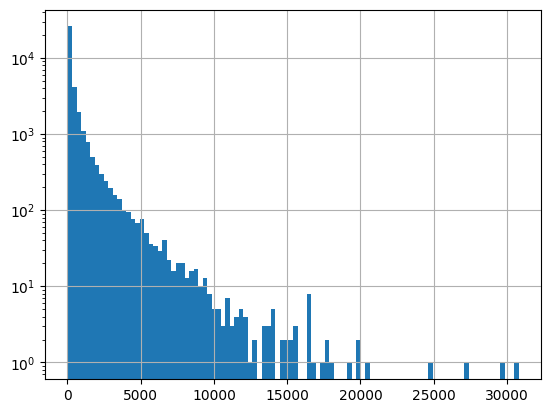

In [4]:
data['review-count'].hist(bins=100)
plt.yscale('log')

In [5]:
data['geometry'] = gpd.points_from_xy(*data[['lng_wgs', 'lat_wgs']].astype(float).T.values, crs='epsg:4326')
data = gpd.GeoDataFrame(data)
data_3857 = data.to_crs(epsg=3857)

<Axes: >

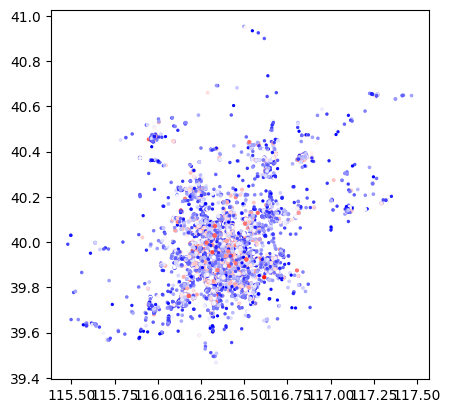

In [6]:
data.plot(column = np.log(np.log(data['review-count'])), cmap='bwr', s=2*np.log(np.log(data['review-count'])))

# pairwise distances to represent spatial interactions

In [7]:
%%time
# Extract x and y coordinates
x_coords = data_3857.geometry.x
y_coords = data_3857.geometry.y

CPU times: user 371 ms, sys: 4.36 ms, total: 375 ms
Wall time: 374 ms


In [8]:
%%time
# Calculate pairwise differences in x and y
dx = x_coords.values.reshape(-1,1) - x_coords.values.reshape(1,-1)
dy = y_coords.values.reshape(-1,1) - y_coords.values.reshape(1,-1)

CPU times: user 779 ms, sys: 1.2 s, total: 1.98 s
Wall time: 5.26 s


In [9]:
%%time
# Square the differences and sum to get squared distances
squared_distances = dx**2 + dy**2
distances = np.sqrt(squared_distances)

CPU times: user 3.04 s, sys: 28.7 s, total: 31.7 s
Wall time: 3min 46s


CPU times: user 8.26 s, sys: 1.45 s, total: 9.71 s
Wall time: 9.75 s


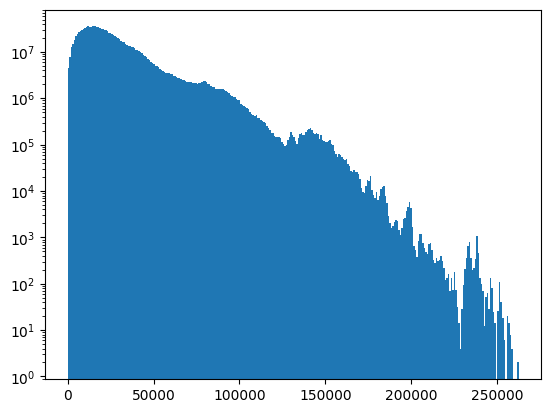

In [30]:
%%time
_ = plt.hist(distances.reshape(-1), bins=300)
plt.yscale('log')

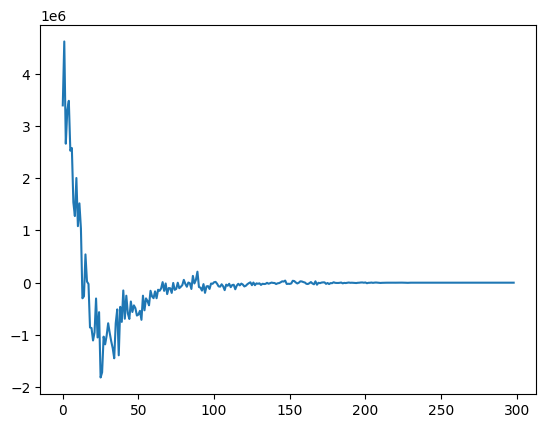

In [31]:
quantiles = np.diff(_[0])
plt.plot(quantiles)